In [2]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Evaluation
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score
)

# Save model
import joblib

%matplotlib inline


In [3]:
df = pd.read_csv("../Data/migraine.csv")
df.head()


,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,Typical aura with migraine


In [4]:
df.shape


(400, 24)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          400 non-null    int64 
 1   Duration     400 non-null    int64 
 2   Frequency    400 non-null    int64 
 3   Location     400 non-null    int64 
 4   Character    400 non-null    int64 
 5   Intensity    400 non-null    int64 
 6   Nausea       400 non-null    int64 
 7   Vomit        400 non-null    int64 
 8   Phonophobia  400 non-null    int64 
 9   Photophobia  400 non-null    int64 
 10  Visual       400 non-null    int64 
 11  Sensory      400 non-null    int64 
 12  Dysphasia    400 non-null    int64 
 13  Dysarthria   400 non-null    int64 
 14  Vertigo      400 non-null    int64 
 15  Tinnitus     400 non-null    int64 
 16  Hypoacusis   400 non-null    int64 
 17  Diplopia     400 non-null    int64 
 18  Defect       400 non-null    int64 
 19  Ataxia       400 non-null    

In [6]:
target_column = "Type"


In [7]:
le = LabelEncoder()
df[target_column] = le.fit_transform(df[target_column])

df[target_column].value_counts()


Type
5    247
2     60
1     24
6     20
0     18
3     17
4     14
Name: count, dtype: int64

In [8]:
X = df.drop(columns=target_column)
y = df[target_column]


In [9]:
rf_selector = RandomForestClassifier(
    n_estimators=500,
    random_state=42
)

rf_selector.fit(X, y)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",500
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [10]:
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_selector.feature_importances_
}).sort_values(by="Importance", ascending=False)

importance_df


,Feature,Importance
10,Visual,0.250230
5,Intensity,0.096897
0,Age,0.086752
14,Vertigo,0.076266
2,Frequency,0.068643
4,Character,0.060080
3,Location,0.060043
11,Sensory,0.049788
15,Tinnitus,0.042040
12,Dysphasia,0.033103


In [60]:
# select features only visual intensty age vertigo frequency sensory dpf duation vomit
important_features = [
    "Visual","Intensity", "Age", "Vertigo", "Frequency","Character", 
    "Sensory", "DPF", "Duration", "Vomit","Nausea"
]
X_selected = df[important_features]
X_selected.head()

,Visual,Intensity,Age,Vertigo,Frequency,Character,Sensory,DPF,Duration,Vomit,Nausea
0,1,2,30,0,5,1,2,0,1,0,1
1,2,3,50,1,5,1,1,0,3,1,1
2,2,2,53,0,1,1,0,0,2,1,1
3,2,3,45,1,5,1,2,0,3,0,1
4,4,2,53,0,1,1,0,1,1,0,1


In [61]:
df_reduced = df[important_features + [target_column]]
df_reduced.head()


,Visual,Intensity,Age,Vertigo,Frequency,Character,Sensory,DPF,Duration,Vomit,Nausea,Type
0,1,2,30,0,5,1,2,0,1,0,1,5
1,2,3,50,1,5,1,1,0,3,1,1,5
2,2,2,53,0,1,1,0,0,2,1,1,5
3,2,3,45,1,5,1,2,0,3,0,1,5
4,4,2,53,0,1,1,0,1,1,0,1,5


In [62]:
X_final = df_reduced.drop(columns=target_column)
y_final = df_reduced[target_column]

X_train, X_test, y_train, y_test = train_test_split(
    X_final,
    y_final,
    test_size=0.2,
    random_state=42,
    stratify=y_final
)


In [63]:
final_model = RandomForestClassifier(
    n_estimators=400,
    max_depth=10,
    random_state=42
)

final_model.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",400
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y

In [64]:
y_pred = final_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.8875

Classification Report:

              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.60      0.60      0.60         5
           2       0.92      1.00      0.96        12
           3       1.00      0.67      0.80         3
           4       1.00      0.33      0.50         3
           5       0.90      0.96      0.93        49
           6       1.00      1.00      1.00         4

    accuracy                           0.89        80
   macro avg       0.87      0.72      0.77        80
weighted avg       0.89      0.89      0.88        80



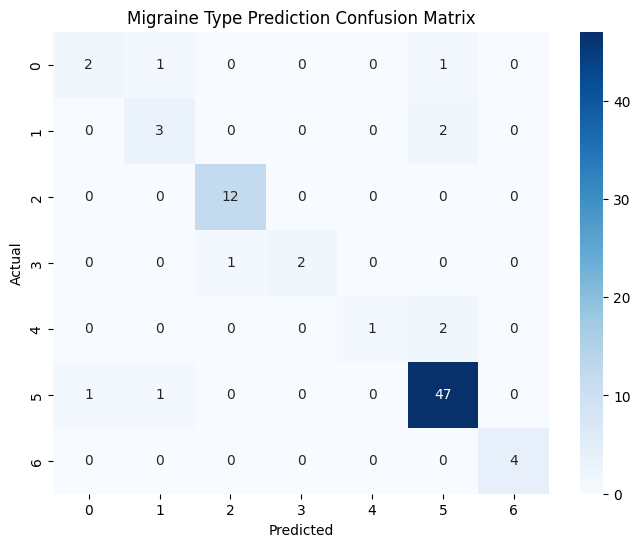

In [65]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Migraine Type Prediction Confusion Matrix")
plt.show()


In [66]:
df_reduced.head()

,Visual,Intensity,Age,Vertigo,Frequency,Character,Sensory,DPF,Duration,Vomit,Nausea,Type
0,1,2,30,0,5,1,2,0,1,0,1,5
1,2,3,50,1,5,1,1,0,3,1,1,5
2,2,2,53,0,1,1,0,0,2,1,1,5
3,2,3,45,1,5,1,2,0,3,0,1,5
4,4,2,53,0,1,1,0,1,1,0,1,5


In [68]:

new_patient_raw = {
    "Visual": 2,
    "Intensity": 3,
    "Age": 27,
    "Vertigo": 1,
    "Frequency": 5,
    "Character": 1,
    "Sensory": 0,
    "Duration": 1,
    "Vomit": 0,
    "Nausea": 1,
    "DPF": 0,

}
new_patient = pd.DataFrame([new_patient_raw])

# Reorder + ensure all required columns exist
new_patient = new_patient.reindex(columns=important_features, fill_value=0)

new_patient
prediction = final_model.predict(new_patient)
predicted_type = le.inverse_transform(prediction)

print("🧠 Predicted Migraine Type:", predicted_type[0])



🧠 Predicted Migraine Type: Basilar-type aura


In [71]:
# Save the best model 
joblib.dump(final_model, "../backend/ml_models/migraine/migraine_model.pkl")
joblib.dump(le, "../backend/ml_models/migraine/migraine_label_encoder.pkl")
joblib.dump(important_features, "../backend/ml_models/migraine/migraine_important_features.pkl")

['../backend/ml_models/migraine/migraine_important_features.pkl']

## | Feature               | With Aura   | Without Aura |

## | --------------------- | ----------- | ------------ |

## | Warning signs         | ✅ Yes       | ❌ No      |

## | Visual symptoms       | Very common | Rare         |

## | Onset                 | Gradual     | Sudden       |

## | Neurological symptoms | Present     | Absent       |

## | Frequency             | Less common | More common  |
